# 3 图像灰度值变换

灰度值 (intensity)

### 二值化

二值化 (binarize) 把图像每个像素变成纯黑或纯白的像素.


### 负变换

负变换 (negative) 把灰度值用最大值减, 使得较黑的像素变白, 较白的像素变黑.

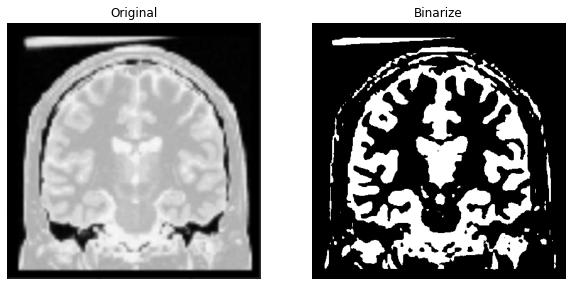

In [31]:
from matplotlib import pyplot as plt 
import numpy as np 
from PIL import Image 
import os
threshold = 200
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\brain.png')).convert('L'))
img_bin = np.where(img > threshold, 1, 0)
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img_bin, cmap = 'gray')
plt.axis('off')
plt.title('Binarize')
plt.show()

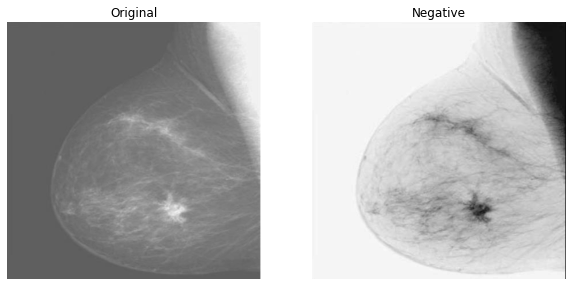

In [30]:
from matplotlib import pyplot as plt 
import numpy as np 
from PIL import Image 
import os
threshold = 200
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\tissue.png')).convert('L'))
img_neg = np.max(img) - img 
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img_neg, cmap = 'gray')
plt.axis('off')
plt.title('Negative')
plt.show()

## 基于直方图的变换

(Histogram-based transform) 观察灰度值的分布函数 (直方图), 再进行变换.

灰度值在 $[0,255]$ 间均匀分布比较好看.

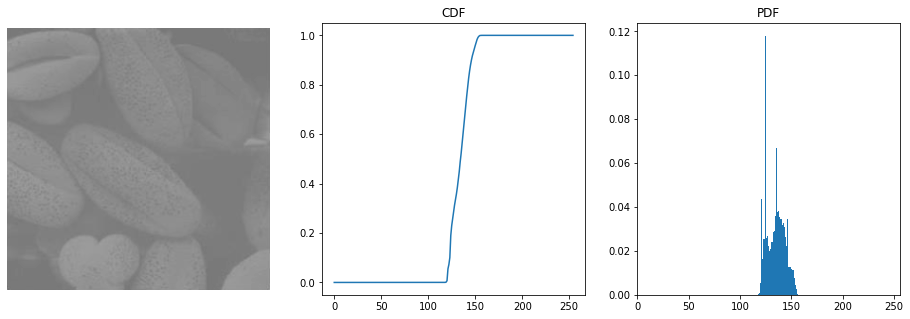

In [6]:
from matplotlib import pyplot as plt 
import numpy as np 
from PIL import Image 
import os
cdf = lambda x: np.array([np.sum(x <= i) for i in range(255)]) / x.size
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\cells.png')).convert('L')).astype('float')
def plotimage(img, bins = 40):
    img = img.clip(0,255).astype('uint8')
    plt.figure(figsize = (16, 5))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.plot(cdf(img))
    plt.title('CDF')
    plt.subplot(1,3,3)
    plt.hist(img.flatten(), bins = bins, density = True)
    plt.xlim(0, 256)
    plt.title('PDF')
    plt.show()
plotimage(img)

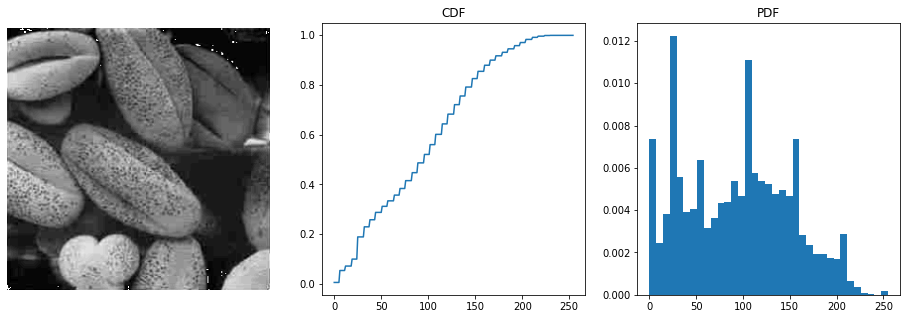

In [47]:
# 将 [120, 160) 的像素仿射拉伸至 [0, 256)
img_trans = (6.4 * (img - 120)).clip(0, 255)
plotimage(img_trans, bins = 35)

### 直方图均衡化

直方图均衡化 (histogram equalization) 变成(接近)真正的均匀分布: 获得每个像素点灰度值的**排名**, 按比例对应到 $[0,255]$

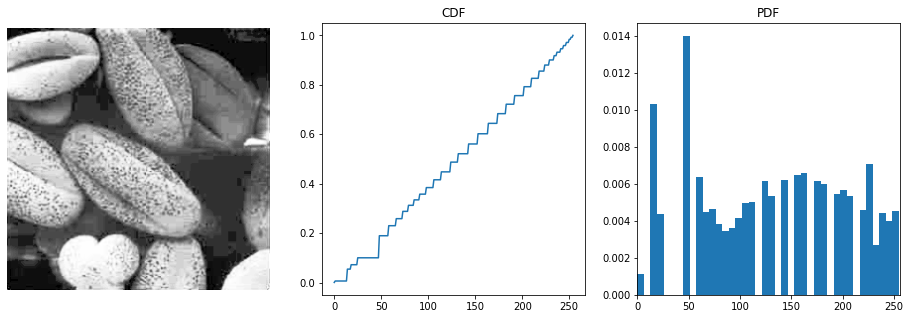

In [16]:
rank = cdf(img)[img.astype('int')]
img_uniform = (rank * 255.)
plotimage(img_uniform)

### 局部直方图处理

先计算图像局部区域的直方图. 判断局部是否需要在局部均衡化.

## 熵 

熵 (Entropy) 衡量一个概率分布的均匀程度. 
$$H = -\mathbb E(p\log p)=-\sum_i p_i \log p_i$$

In [24]:
from matplotlib import pyplot as plt 
import numpy as np 
from PIL import Image 
import os
cdf = lambda x: np.array([np.sum(x <= i) for i in range(255)]) / x.size
pdf = lambda x: np.diff(cdf(x), prepend = 0)
def entropy(img):
    pdf_ = pdf(img)
    pdf_ = np.where(pdf_ < 1e-8, 1, pdf_) # prevent log(0)
    return -np.sum(pdf_ * np.log(pdf_))
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\cells.png')).convert('L')).astype('float')
print('Original  Entropy =', entropy(img))
print('Strenched Entropy =', entropy((6.4 * (img - 120)).clip(0, 255)))
print('Equalized Entropy =', entropy(cdf(img)[img.astype('int')] * 255.))


Original  Entropy = 3.43671310203673
Strenched Entropy = 3.432641910415029
Equalized Entropy = 3.3899648471684287


### 熵图像

对图像每个像素计算局部的熵值, 把所有像素的局部熵绘制成新的图片, 称为熵图像 (entropy image).